# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [19]:
import pandas as pd
import plotly.express as px
import numpy as np

In [21]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df[['Limite_Credito','Salário']] = df[['Limite_Credito', 'Salário']].astype(float)
df.head(5)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500.0,2500.0,0,Casamento,0
1,Joao,30,Médico,8000.0,4000.0,0,Casamento,0
2,Charlie,35,Professor,5000.0,4000.0,0,Solteiro,0
3,David,40,Advogado,10000.0,1000.0,1,Solteiro,1
4,Eva,45,Médico,12000.0,10000.0,0,Casamento,1


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

PRIMEIRA ANÁLISE


A primeira associação que tende se a fazer quando a análise é sobre limite de crédito, é avaliar o valor do salário de uma pessoa.
Supõe se que o valor de crédito seja equivalente ao valor do salário, então , será proposto uma avaliação através do gráfico de barras com a média salarial através da profissão e um gráfico de linha com a média do limite de crédito em relação a profissão.    



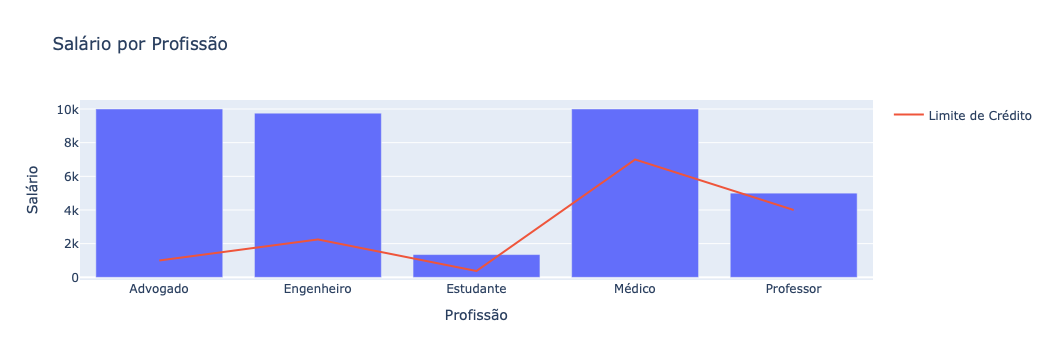

In [22]:
media_salario = df.groupby('Profissão')['Salário'].mean().reset_index()
fig_1 = px.bar(media_salario, x='Profissão', y='Salário', title='Salário por Profissão')

media_limite = df.groupby('Profissão')['Limite_Credito'].mean().reset_index()
fig_2 = px.line(media_limite, x='Profissão', y='Limite_Credito', title='Limite de Crédito por Profissão')

fig_combined = px.bar(media_salario, x='Profissão', y='Salário', title='Salário por Profissão')
fig_combined.add_scatter(x=media_limite['Profissão'], y=media_limite['Limite_Credito'], mode='lines', name='Limite de Crédito')

fig_combined.show()

In [ ]:
SEGUNDA ANÁLISE 


In [ ]:
Segundo a nossa primeira análise não existe uma relação direta do limite de crédito com o valor de salário, uma vez que na profissão 
advogado, por exemplo, que tem a mesma média de salário que o médico mas entretanto o limite de crédito é 600% inferior. 
Agora será proposto uma análise sobre o limite de crédito e o histórico de inadimplência.

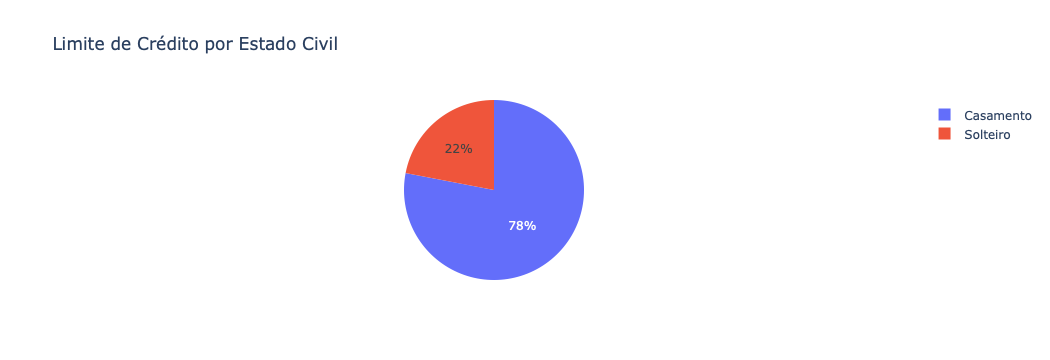

In [25]:
media_estado_civil = df.groupby('Estado_Civil')['Limite_Credito'].mean().reset_index()
fig = px.pie(media_estado_civil, values='Limite_Credito', names='Estado_Civil', title='Limite de Crédito por Estado Civil')
fig.show()

In [ ]:
TERCEIRA ANÁLISE 


Notamos que nessa última análise as pessoas casadas têm um limite de crédito 254% maior em relação 
as pessoas solteiras, uma diferença significativa, por portanto para nossa próxima análise será proposto 
um gráfico que relacione o limite de crédito e a idade das pessoas.

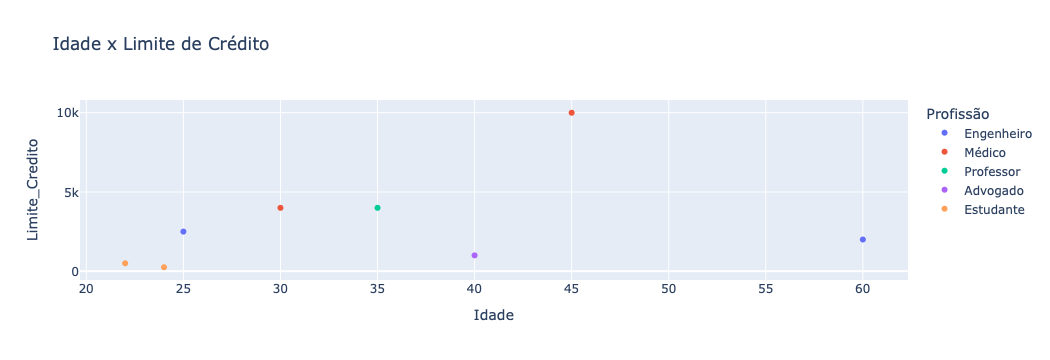

In [26]:
fig = px.scatter(df, x='Idade', y='Limite_Credito', color= 'Profissão', title= 'Idade x Limite de Crédito')
fig.show()

In [ ]:
CONCLUSÃO


Considerando nossas análises, é possível perceber que nao há uma relação direta entre o limite de crédito
e o salário de cada respectiva profissão. É possível que um dos fatores principais que impulsionam o limite de crédito seja 
a estabilidade de cada pessoa. Observando a segunda análise,por exemplo, onde reforça a ideia do limite de crédito ter relação com a estabilidade financeira , o limite de crédito para pessoas casadas é consideravelmente 
mais alto e os motivos possivelmente são  renda combinada, gestão financeira conjunta ou cartões adicionais onde compartillham 
o mesmo limite do cartão principal.